In [9]:
import math
import numpy as np
import cv2

In [1]:
pip install mediapipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 32.9 MB 1.5 MB/s 


In [4]:
import mediapipe as mp

In [6]:
#accessing the face detection and drawing utils
mp_face_detection = mp.solutions.face_detection
mp_drawing = mp.solutions.drawing_utils

In [7]:
#upload the first pic from the local storage
#short range
from google.colab import files
uploaded_short_range = files.upload()

Saving dougy.jpg to dougy.jpg


In [8]:
#upload the second pic from the local storage
#long range
from google.colab import files
uploaded_full_range = files.upload()

Saving IMG_0761.JPG to IMG_0761.JPG


dougy.jpg
Height of image  is 960pxs and width is 1280 pxs


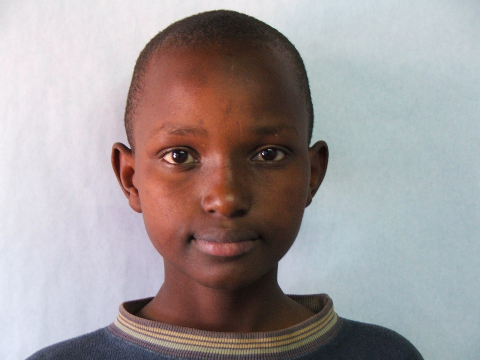

IMG_0761.JPG
Height of image  is 4000pxs and width is 6000 pxs


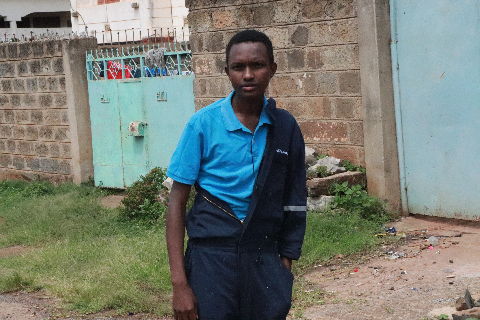

In [26]:
from google.colab.patches import cv2_imshow

desired_height = 480
desired_width = 480
def resize_and_show(image):
  #print(image.shape)
  height, width = image.shape[:2]
  print(f"Height of image  is {height}pxs and width is {width} pxs")
  if height < width:
    img = cv2.resize(image,(desired_width,math.floor(height/(width/desired_width))))
  else:
    img = cv2.resize(image, (math.floor(width/(desired_height)), desired_height))
  cv2_imshow(img)

#preview the images
short_range_images = {name: cv2.imread(name) for name in uploaded_short_range.keys()}
#print(short_range_images.items())
for name, image in short_range_images.items():
  print(name)
  resize_and_show(image)

full_range_images = {name: cv2.imread(name) for name in uploaded_full_range.keys()}
for name, image in full_range_images.items():
  print(name)
  resize_and_show(image)

In [29]:
#drawing marks on the face
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius =5)

In [15]:
#getting info about face_detecion
help(mp_face_detection.FaceDetection)

Help on class FaceDetection in module mediapipe.python.solutions.face_detection:

class FaceDetection(mediapipe.python.solution_base.SolutionBase)
 |  FaceDetection(min_detection_confidence=0.5, model_selection=0)
 |  
 |  MediaPipe Face Detection.
 |  
 |  MediaPipe Face Detection processes an RGB image and returns a list of the
 |  detected face location data.
 |  
 |  Please refer to
 |  https://solutions.mediapipe.dev/face_detection#python-solution-api
 |  for usage examples.
 |  
 |  Method resolution order:
 |      FaceDetection
 |      mediapipe.python.solution_base.SolutionBase
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, min_detection_confidence=0.5, model_selection=0)
 |      Initializes a MediaPipe Face Detection object.
 |      
 |      Args:
 |        min_detection_confidence: Minimum confidence value ([0.0, 1.0]) for face
 |          detection to be considered successful. See details in
 |          https://solutions.mediapipe.dev/face_det

Face detections of dougy.jpg:
Height of image  is 960pxs and width is 1280 pxs


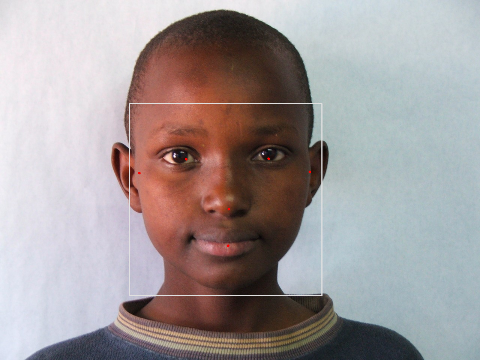

In [30]:
#run mediapipe face detection with short range modell
with mp_face_detection.FaceDetection(
    min_detection_confidence = 0.5, model_selection =0) as face_detection:
    for name, image in short_range_images.items():
      #convert the bgr image to rgb and proocess it with mediapipe face detection
      results = face_detection.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

      #draw face detections of each face
      print(f"Face detections of {name}:")
      if not results.detections:
        continue
      annotated_image = image.copy()
      for detection in results.detections:
        mp_drawing.draw_detection(annotated_image, detection)
      resize_and_show(annotated_image)
